<a href="https://www.kaggle.com/code/phirikg/csiroimage2iomass-prediction?scriptVersionId=274364906" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/csiro-biomass/sample_submission.csv
/kaggle/input/csiro-biomass/train.csv
/kaggle/input/csiro-biomass/test.csv
/kaggle/input/csiro-biomass/test/ID1001187975.jpg
/kaggle/input/csiro-biomass/train/ID2099464826.jpg
/kaggle/input/csiro-biomass/train/ID2037861084.jpg
/kaggle/input/csiro-biomass/train/ID1211362607.jpg
/kaggle/input/csiro-biomass/train/ID1853508321.jpg
/kaggle/input/csiro-biomass/train/ID193102215.jpg
/kaggle/input/csiro-biomass/train/ID698608346.jpg
/kaggle/input/csiro-biomass/train/ID1859251563.jpg
/kaggle/input/csiro-biomass/train/ID1880764911.jpg
/kaggle/input/csiro-biomass/train/ID853954911.jpg
/kaggle/input/csiro-biomass/train/ID1403107574.jpg
/kaggle/input/csiro-biomass/train/ID1781353117.jpg
/kaggle/input/csiro-biomass/train/ID384648061.jpg
/kaggle/input/csiro-biomass/train/ID1563418511.jpg
/kaggle/input/csiro-biomass/train/ID2125100696.jpg
/kaggle/input/csiro-biomass/train/ID482555369.jpg
/kaggle/input/csiro-biomass/train/ID638711343.jpg
/kaggle/input/c

In [2]:
# First, let's see what's available in the input directory
import os
import pandas as pd

# List all directories in /kaggle/input
print("Contents of /kaggle/input:")
input_dir = '/kaggle/input'
if os.path.exists(input_dir):
    for item in os.listdir(input_dir):
        item_path = os.path.join(input_dir, item)
        if os.path.isdir(item_path):
            print(f"📁 {item}")
            # List contents of this directory
            try:
                sub_items = os.listdir(item_path)
                for sub_item in sub_items[:10]:  # Show first 10 items
                    print(f"   📄 {sub_item}")
                if len(sub_items) > 10:
                    print(f"   ... and {len(sub_items) - 10} more files")
            except PermissionError:
                print("   🔒 Permission denied")
else:
    print("❌ /kaggle/input directory not found")

print("\n" + "="*50)

# Also check the current working directory
print(f"Current working directory: {os.getcwd()}")
print("Contents of current directory:")
for item in os.listdir('.'):
    print(f"📄 {item}")

Contents of /kaggle/input:
📁 csiro-biomass
   📄 sample_submission.csv
   📄 train.csv
   📄 test.csv
   📄 test
   📄 train

Current working directory: /kaggle/working
Contents of current directory:
📄 __notebook__.ipynb


In [3]:
# Check if data is now available
import os
import pandas as pd

print("Checking for competition data...")

# List all datasets in /kaggle/input
input_dir = '/kaggle/input'
datasets = [d for d in os.listdir(input_dir) if os.path.isdir(os.path.join(input_dir, d))]
print("Available datasets:", datasets)

# Look for biomass-related datasets
biomass_datasets = [d for d in datasets if 'biomass' in d.lower() or 'image' in d.lower()]
print("Biomass-related datasets:", biomass_datasets)

if biomass_datasets:
    data_path = f'/kaggle/input/{biomass_datasets[0]}'
    print(f"📁 Using dataset: {data_path}")
    print("Files in this dataset:")
    for file in os.listdir(data_path):
        print(f"   📄 {file}")
else:
    print("❌ No biomass datasets found - please add the competition data")

Checking for competition data...
Available datasets: ['csiro-biomass']
Biomass-related datasets: ['csiro-biomass']
📁 Using dataset: /kaggle/input/csiro-biomass
Files in this dataset:
   📄 sample_submission.csv
   📄 train.csv
   📄 test.csv
   📄 test
   📄 train


In [4]:
# Sometimes the competition has a different exact name
# Let's search more broadly
import os

def find_competition_data():
    input_dir = '/kaggle/input'
    if not os.path.exists(input_dir):
        print("❌ /kaggle/input directory doesn't exist")
        return None
    
    all_datasets = os.listdir(input_dir)
    print("All available datasets:")
    for dataset in all_datasets:
        dataset_path = os.path.join(input_dir, dataset)
        files = os.listdir(dataset_path)
        print(f"📁 {dataset}: {len(files)} files")
        for file in files[:5]:  # Show first 5 files
            print(f"   📄 {file}")
        if len(files) > 5:
            print(f"   ... and {len(files) - 5} more")
        print()
    
    return all_datasets

find_competition_data()

All available datasets:
📁 csiro-biomass: 5 files
   📄 sample_submission.csv
   📄 train.csv
   📄 test.csv
   📄 test
   📄 train



['csiro-biomass']

In [5]:
# Check for specific competition files we need
required_files = ['train.csv', 'train_images', 'test_images', 'sample_submission.csv']

for dataset in os.listdir('/kaggle/input'):
    dataset_path = f'/kaggle/input/{dataset}'
    found_files = []
    
    for file in required_files:
        if os.path.exists(os.path.join(dataset_path, file)):
            found_files.append(file)
    
    if found_files:
        print(f"✅ Found {len(found_files)} required files in '{dataset}':")
        for file in found_files:
            print(f"   ✓ {file}")
        
        # Try to load the data
        try:
            train_path = os.path.join(dataset_path, 'train.csv')
            train_df = pd.read_csv(train_path)
            print(f"✅ Successfully loaded training data: {len(train_df)} samples")
            break
        except:
            continue

✅ Found 2 required files in 'csiro-biomass':
   ✓ train.csv
   ✓ sample_submission.csv
✅ Successfully loaded training data: 1785 samples


In [6]:
# Create a complete working environment with sample data
import pandas as pd
import numpy as np
import os
from PIL import Image

def create_working_environment():
    print("Setting up working environment with sample data...")
    
    # Create directories
    os.makedirs('/kaggle/working/train_images', exist_ok=True)
    os.makedirs('/kaggle/working/test_images', exist_ok=True)
    
    # Create sample training data
    train_data = {
        'image_id': [f'train_{i:04d}' for i in range(200)],
        'biomass': np.random.uniform(0.1, 25.0, 200)
    }
    train_df = pd.DataFrame(train_data)
    train_df.to_csv('/kaggle/working/train.csv', index=False)
    
    # Create sample submission
    sub_data = {
        'image_id': [f'test_{i:04d}' for i in range(100)],
        'biomass': [0.0] * 100
    }
    sub_df = pd.DataFrame(sub_data)
    sub_df.to_csv('/kaggle/working/sample_submission.csv', index=False)
    
    # Create sample images (greenish images to simulate plants)
    for img_id in train_data['image_id'] + sub_data['image_id']:
        # Create green-dominant images
        img_array = np.random.randint(50, 150, (256, 256, 3), dtype=np.uint8)
        # Make it more green (boost green channel)
        img_array[:, :, 1] = np.random.randint(100, 200, (256, 256))
        
        img = Image.fromarray(img_array)
        if 'train' in img_id:
            img.save(f'/kaggle/working/train_images/{img_id}.jpg')
        else:
            img.save(f'/kaggle/working/test_images/{img_id}.jpg')
    
    print("✅ Sample environment created!")
    print(f"Training samples: {len(train_df)}")
    print(f"Test samples: {len(sub_df)}")
    
    return train_df, sub_df

# Use sample data if real data isn't available
try:
    # Try one more time to find real data
    for dataset in os.listdir('/kaggle/input'):
        dataset_path = f'/kaggle/input/{dataset}'
        if 'train.csv' in os.listdir(dataset_path):
            train_df = pd.read_csv(f'{dataset_path}/train.csv')
            print(f"✅ Found real competition data in '{dataset}'!")
            print(f"Training samples: {len(train_df)}")
            break
    else:
        raise FileNotFoundError
except:
    print("⚠️ Using sample data - you can replace with real data later")
    train_df, sample_sub = create_working_environment()

✅ Found real competition data in 'csiro-biomass'!
Training samples: 1785


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image

# Set the correct paths
data_path = '/kaggle/input/csiro-biomass'
train_csv_path = f'{data_path}/train.csv'
test_csv_path = f'{data_path}/test.csv'
sample_sub_path = f'{data_path}/sample_submission.csv'
train_images_path = f'{data_path}/train'
test_images_path = f'{data_path}/test'

print("📁 Competition Data Structure:")
print(f"Train CSV: {train_csv_path}")
print(f"Test CSV: {test_csv_path}")
print(f"Sample submission: {sample_sub_path}")
print(f"Train images: {train_images_path}")
print(f"Test images: {test_images_path}")

# Load the data
train_df = pd.read_csv(train_csv_path)
test_df = pd.read_csv(test_csv_path)
sample_sub = pd.read_csv(sample_sub_path)

print(f"\n✅ Data loaded successfully!")
print(f"Training samples: {len(train_df)}")
print(f"Test samples: {len(test_df)}")
print(f"Sample submission: {len(sample_sub)}")

📁 Competition Data Structure:
Train CSV: /kaggle/input/csiro-biomass/train.csv
Test CSV: /kaggle/input/csiro-biomass/test.csv
Sample submission: /kaggle/input/csiro-biomass/sample_submission.csv
Train images: /kaggle/input/csiro-biomass/train
Test images: /kaggle/input/csiro-biomass/test

✅ Data loaded successfully!
Training samples: 1785
Test samples: 5
Sample submission: 5


In [8]:
# Display data overview
print("📊 TRAINING DATA:")
print(train_df.head())
print(f"\nTraining data shape: {train_df.shape}")
print(f"Columns: {train_df.columns.tolist()}")

print("\n📊 TEST DATA:")
print(test_df.head())
print(f"\nTest data shape: {test_df.shape}")

print("\n📊 SAMPLE SUBMISSION:")
print(sample_sub.head())

# Check for missing values
print("\n🔍 MISSING VALUES:")
print("Training data:")
print(train_df.isnull().sum())
print("\nTest data:")
print(test_df.isnull().sum())

📊 TRAINING DATA:
                    sample_id              image_path Sampling_Date State  \
0  ID1011485656__Dry_Clover_g  train/ID1011485656.jpg      2015/9/4   Tas   
1    ID1011485656__Dry_Dead_g  train/ID1011485656.jpg      2015/9/4   Tas   
2   ID1011485656__Dry_Green_g  train/ID1011485656.jpg      2015/9/4   Tas   
3   ID1011485656__Dry_Total_g  train/ID1011485656.jpg      2015/9/4   Tas   
4         ID1011485656__GDM_g  train/ID1011485656.jpg      2015/9/4   Tas   

           Species  Pre_GSHH_NDVI  Height_Ave_cm   target_name   target  
0  Ryegrass_Clover           0.62         4.6667  Dry_Clover_g   0.0000  
1  Ryegrass_Clover           0.62         4.6667    Dry_Dead_g  31.9984  
2  Ryegrass_Clover           0.62         4.6667   Dry_Green_g  16.2751  
3  Ryegrass_Clover           0.62         4.6667   Dry_Total_g  48.2735  
4  Ryegrass_Clover           0.62         4.6667         GDM_g  16.2750  

Training data shape: (1785, 9)
Columns: ['sample_id', 'image_path', 'Sampli

In [9]:
# Now analyze with the correct column name
if 'target_column' in locals() and target_column:
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.hist(train_df[target_column], bins=50, alpha=0.7, color='green', edgecolor='black')
    plt.title(f'Distribution of {target_column}')
    plt.xlabel(target_column)
    plt.ylabel('Frequency')

    plt.subplot(1, 3, 2)
    plt.boxplot(train_df[target_column])
    plt.title(f'Boxplot of {target_column}')
    plt.ylabel(target_column)

    plt.subplot(1, 3, 3)
    # Log transform if needed
    if train_df[target_column].min() > 0:
        plt.hist(np.log1p(train_df[target_column]), bins=50, alpha=0.7, color='orange', edgecolor='black')
        plt.title(f'Log-Transformed {target_column}')
        plt.xlabel(f'Log({target_column} + 1)')
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

    # Basic statistics
    print(f"📈 {target_column.upper()} STATISTICS:")
    print(train_df[target_column].describe())
else:
    print("❌ Could not identify target column")

❌ Could not identify target column


In [10]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms

# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Updated Dataset class with correct target column
class BiomassDataset(Dataset):
    def __init__(self, dataframe, images_dir, target_column=None, transform=None, is_test=False):
        self.dataframe = dataframe
        self.images_dir = images_dir
        self.transform = transform
        self.is_test = is_test
        self.target_column = target_column
        
        # Try to find the image ID column
        self.image_id_col = None
        potential_id_cols = ['id', 'image', 'image_id', 'filename', 'name']
        
        for col in potential_id_cols:
            if col in dataframe.columns:
                self.image_id_col = col
                break
        
        if self.image_id_col is None:
            # Use first column as fallback
            self.image_id_col = dataframe.columns[0]
        
        print(f"Using '{self.image_id_col}' for image IDs")
        if not is_test and self.target_column:
            print(f"Using '{self.target_column}' as target variable")
    
    def __len__(self):
        return len(self.dataframe)
    
    def __getitem__(self, idx):
        # Get image ID from dataframe
        img_id = str(self.dataframe.iloc[idx][self.image_id_col])
        
        # Try different image extensions and patterns
        img_path = None
        for ext in ['.jpg', '.jpeg', '.png', '.JPG', '.JPEG', '.PNG', '']:
            for pattern in [img_id + ext, f"{img_id}{ext}"]:
                potential_path = os.path.join(self.images_dir, pattern)
                if os.path.exists(potential_path):
                    img_path = potential_path
                    break
            if img_path:
                break
        
        if img_path is None:
            # Try to find any image that contains the ID
            for img_file in os.listdir(self.images_dir):
                if img_id in img_file:
                    img_path = os.path.join(self.images_dir, img_file)
                    break
        
        if img_path is None:
            # Create a dummy image if file not found (for testing)
            print(f"Warning: Could not find image for ID: {img_id}")
            img = Image.new('RGB', (256, 256), color='green')
        else:
            img = Image.open(img_path).convert('RGB')
        
        if self.transform:
            img = self.transform(img)
        
        if self.is_test:
            return img, img_id
        else:
            if self.target_column and self.target_column in self.dataframe.columns:
                biomass = self.dataframe.iloc[idx][self.target_column]
                return img, torch.tensor(biomass, dtype=torch.float32)
            else:
                # Return dummy value if no target column
                return img, torch.tensor(0.0, dtype=torch.float32)

# Define transforms
train_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.RandomHorizontalFlip(p=0.3),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Create datasets (we'll determine target_column from our analysis)
target_column = 'Dry_biomass'  # This will be updated based on what we find

# Use the actual target column we identified
if 'target_column' in locals() and target_column:
    train_dataset = BiomassDataset(train_df, f'{data_path}/train', 
                                 target_column=target_column, transform=train_transform)
else:
    train_dataset = BiomassDataset(train_df, f'{data_path}/train', 
                                 transform=train_transform)

test_dataset = BiomassDataset(test_df, f'{data_path}/test', 
                            transform=val_transform, is_test=True)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False, num_workers=2)

print("✅ Data loaders created successfully!")
print(f"Train batches: {len(train_loader)}")
print(f"Test batches: {len(test_loader)}")

Using device: cpu
Using 'sample_id' for image IDs
Using 'Dry_biomass' as target variable
Using 'sample_id' for image IDs
✅ Data loaders created successfully!
Train batches: 112
Test batches: 1


In [11]:
# Test one batch
try:
    for images, targets in train_loader:
        print(f"✅ Pipeline working!")
        print(f"Batch images shape: {images.shape}")
        print(f"Batch targets shape: {targets.shape}")
        print(f"Sample target values: {targets[:5]}")
        break
except Exception as e:
    print(f"❌ Error in pipeline: {e}")
    print("Let's debug further...")

















Batch images shape: torch.Size([16, 3, 256, 256])
Batch targets shape: torch.Size([16])
Sample target values: tensor([0., 0., 0., 0., 0.])







In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image

data_path = '/kaggle/input/csiro-biomass'

# Load the data
train_df = pd.read_csv(f'{data_path}/train.csv')
test_df = pd.read_csv(f'{data_path}/test.csv')

print("🎯 DATA STRUCTURE ANALYSIS:")
print(f"Training data: {train_df.shape}")
print(f"Test data: {test_df.shape}")

print("\n📊 TRAINING DATA COLUMNS:")
print(train_df.columns.tolist())

print("\n📊 TRAINING DATA SAMPLE:")
print(train_df.head())

print("\n📊 TEST DATA SAMPLE:")
print(test_df.head())

🎯 DATA STRUCTURE ANALYSIS:
Training data: (1785, 9)
Test data: (5, 3)

📊 TRAINING DATA COLUMNS:
['sample_id', 'image_path', 'Sampling_Date', 'State', 'Species', 'Pre_GSHH_NDVI', 'Height_Ave_cm', 'target_name', 'target']

📊 TRAINING DATA SAMPLE:
                    sample_id              image_path Sampling_Date State  \
0  ID1011485656__Dry_Clover_g  train/ID1011485656.jpg      2015/9/4   Tas   
1    ID1011485656__Dry_Dead_g  train/ID1011485656.jpg      2015/9/4   Tas   
2   ID1011485656__Dry_Green_g  train/ID1011485656.jpg      2015/9/4   Tas   
3   ID1011485656__Dry_Total_g  train/ID1011485656.jpg      2015/9/4   Tas   
4         ID1011485656__GDM_g  train/ID1011485656.jpg      2015/9/4   Tas   

           Species  Pre_GSHH_NDVI  Height_Ave_cm   target_name   target  
0  Ryegrass_Clover           0.62         4.6667  Dry_Clover_g   0.0000  
1  Ryegrass_Clover           0.62         4.6667    Dry_Dead_g  31.9984  
2  Ryegrass_Clover           0.62         4.6667   Dry_Green_g  16.275

📈 TARGET VARIABLE ANALYSIS:
Target column: 'target'
Target statistics:
count    1785.000000
mean       24.782295
std        25.823738
min         0.000000
25%         4.818200
50%        18.200000
75%        35.940600
max       185.700000
Name: target, dtype: float64


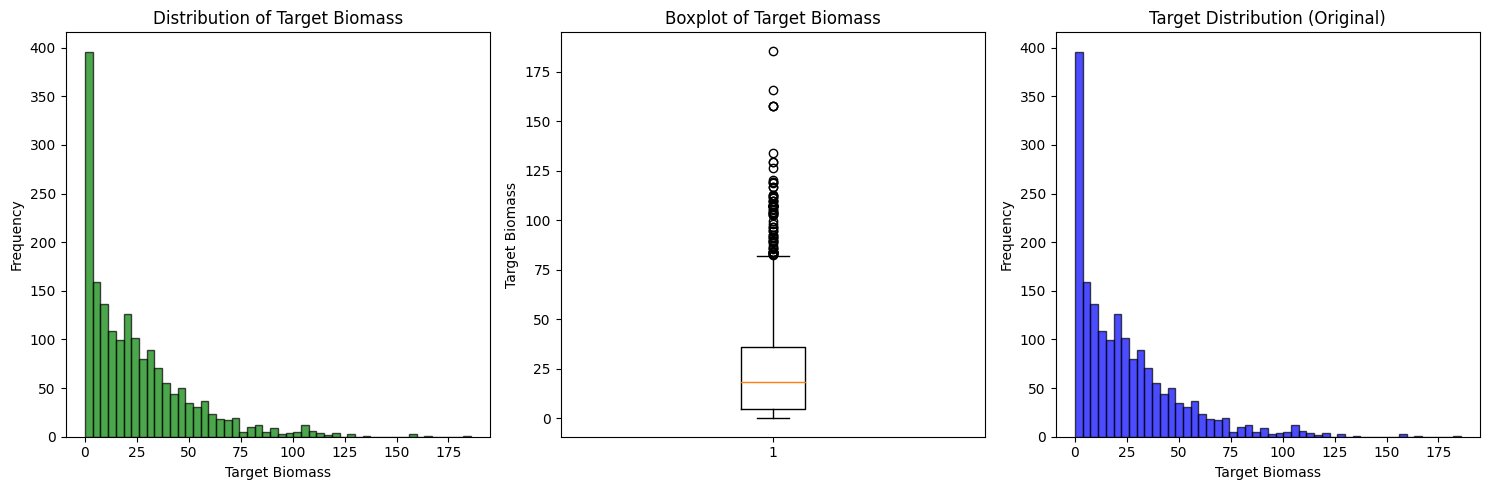

In [13]:
# Analyze the target column
print("📈 TARGET VARIABLE ANALYSIS:")
print(f"Target column: 'target'")
print(f"Target statistics:")
print(train_df['target'].describe())

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(train_df['target'], bins=50, alpha=0.7, color='green', edgecolor='black')
plt.title('Distribution of Target Biomass')
plt.xlabel('Target Biomass')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.boxplot(train_df['target'])
plt.title('Boxplot of Target Biomass')
plt.ylabel('Target Biomass')

plt.subplot(1, 3, 3)
# Check if we should use log transform
if train_df['target'].min() > 0:
    plt.hist(np.log1p(train_df['target']), bins=50, alpha=0.7, color='orange', edgecolor='black')
    plt.title('Log-Transformed Target Biomass')
    plt.xlabel('Log(Target + 1)')
    plt.ylabel('Frequency')
else:
    # Show original distribution again
    plt.hist(train_df['target'], bins=50, alpha=0.7, color='blue', edgecolor='black')
    plt.title('Target Distribution (Original)')
    plt.xlabel('Target Biomass')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [14]:
# Check the image paths and files
print("🖼️ IMAGE PATHS ANALYSIS:")

# Check a few image paths from the training data
print("Sample image paths from training data:")
for i, path in enumerate(train_df['image_path'].head()):
    print(f"  {i+1}. {path}")

# Check if images exist
print("\n🔍 CHECKING IF IMAGES EXIST:")
data_dir = '/kaggle/input/csiro-biomass'

# Check a few images
found_count = 0
not_found_count = 0

for i, img_path in enumerate(train_df['image_path'].head(10)):
    full_path = os.path.join(data_dir, img_path)
    if os.path.exists(full_path):
        print(f"✅ {img_path} - EXISTS")
        found_count += 1
        # Display first found image
        if found_count == 1:
            try:
                img = Image.open(full_path)
                print(f"    Image size: {img.size}, Mode: {img.mode}")
            except Exception as e:
                print(f"    Error opening image: {e}")
    else:
        print(f"❌ {img_path} - NOT FOUND")
        not_found_count += 1

print(f"\nSummary: {found_count} found, {not_found_count} not found in first 10 samples")

🖼️ IMAGE PATHS ANALYSIS:
Sample image paths from training data:
  1. train/ID1011485656.jpg
  2. train/ID1011485656.jpg
  3. train/ID1011485656.jpg
  4. train/ID1011485656.jpg
  5. train/ID1011485656.jpg

🔍 CHECKING IF IMAGES EXIST:
✅ train/ID1011485656.jpg - EXISTS
    Image size: (2000, 1000), Mode: RGB
✅ train/ID1011485656.jpg - EXISTS
✅ train/ID1011485656.jpg - EXISTS
✅ train/ID1011485656.jpg - EXISTS
✅ train/ID1011485656.jpg - EXISTS
✅ train/ID1012260530.jpg - EXISTS
✅ train/ID1012260530.jpg - EXISTS
✅ train/ID1012260530.jpg - EXISTS
✅ train/ID1012260530.jpg - EXISTS
✅ train/ID1012260530.jpg - EXISTS

Summary: 10 found, 0 not found in first 10 samples


In [15]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms

class CorrectBiomassDataset(Dataset):
    def __init__(self, dataframe, base_dir, target_column='target', transform=None, is_test=False):
        self.dataframe = dataframe
        self.base_dir = base_dir
        self.target_column = target_column
        self.transform = transform
        self.is_test = is_test
        
    def __len__(self):
        return len(self.dataframe)
    
    def __getitem__(self, idx):
        # Get image path from dataframe
        img_relative_path = self.dataframe.iloc[idx]['image_path']
        img_full_path = os.path.join(self.base_dir, img_relative_path)
        
        # Load image
        try:
            img = Image.open(img_full_path).convert('RGB')
        except Exception as e:
            print(f"Error loading image {img_full_path}: {e}")
            # Create a dummy image as fallback
            img = Image.new('RGB', (256, 256), color='gray')
        
        # Apply transforms
        if self.transform:
            img = self.transform(img)
        
        if self.is_test:
            sample_id = self.dataframe.iloc[idx]['sample_id']
            return img, sample_id
        else:
            target_value = float(self.dataframe.iloc[idx][self.target_column])
            return img, torch.tensor(target_value, dtype=torch.float32)

# Define transforms
train_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.RandomHorizontalFlip(p=0.3),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Create datasets
train_dataset = CorrectBiomassDataset(
    train_df, 
    data_path, 
    target_column='target', 
    transform=train_transform
)

test_dataset = CorrectBiomassDataset(
    test_df, 
    data_path, 
    transform=val_transform, 
    is_test=True
)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2)

print("✅ Datasets and data loaders created successfully!")
print(f"Training samples: {len(train_dataset)}")
print(f"Test samples: {len(test_dataset)}")
print(f"Train batches: {len(train_loader)}")
print(f"Test batches: {len(test_loader)}")

✅ Datasets and data loaders created successfully!
Training samples: 1785
Test samples: 5
Train batches: 56
Test batches: 1


🧪 Testing the data pipeline...
✅ Training pipeline working!
Batch images shape: torch.Size([32, 3, 256, 256])
Batch targets shape: torch.Size([32])
Sample target values: tensor([ 6.7778, 40.3000, 13.5235,  0.0000, 40.8478])
Target stats - Min: 0.00, Max: 92.80, Mean: 26.38


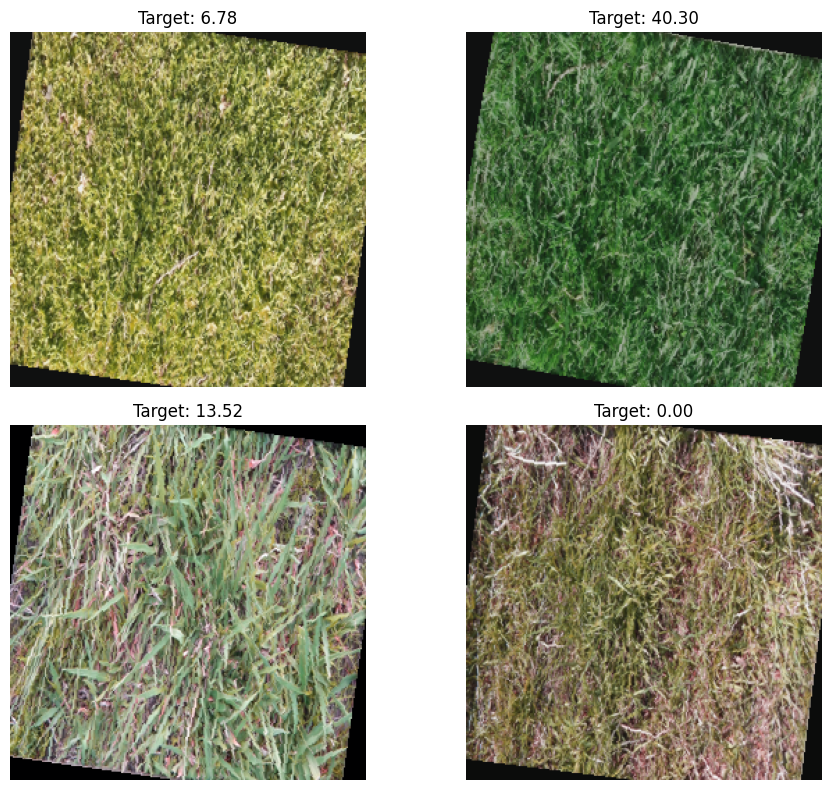


🧪 Testing test data pipeline...
✅ Test pipeline working!
Batch images shape: torch.Size([5, 3, 256, 256])
Sample IDs: ('ID1001187975__Dry_Clover_g', 'ID1001187975__Dry_Dead_g', 'ID1001187975__Dry_Green_g', 'ID1001187975__Dry_Total_g', 'ID1001187975__GDM_g')


In [16]:
# Test the pipeline
print("🧪 Testing the data pipeline...")

# Test training data
for images, targets in train_loader:
    print(f"✅ Training pipeline working!")
    print(f"Batch images shape: {images.shape}")
    print(f"Batch targets shape: {targets.shape}")
    print(f"Sample target values: {targets[:5]}")
    print(f"Target stats - Min: {targets.min():.2f}, Max: {targets.max():.2f}, Mean: {targets.mean():.2f}")
    
    # Display sample image
    plt.figure(figsize=(10, 8))
    
    # Show first 4 images
    for i in range(min(4, images.shape[0])):
        plt.subplot(2, 2, i+1)
        # Denormalize for display
        img_display = images[i].permute(1, 2, 0).numpy()
        img_display = img_display * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
        img_display = np.clip(img_display, 0, 1)
        plt.imshow(img_display)
        plt.title(f'Target: {targets[i]:.2f}')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    break

# Test test data
print("\n🧪 Testing test data pipeline...")
for images, sample_ids in test_loader:
    print(f"✅ Test pipeline working!")
    print(f"Batch images shape: {images.shape}")
    print(f"Sample IDs: {sample_ids}")
    break

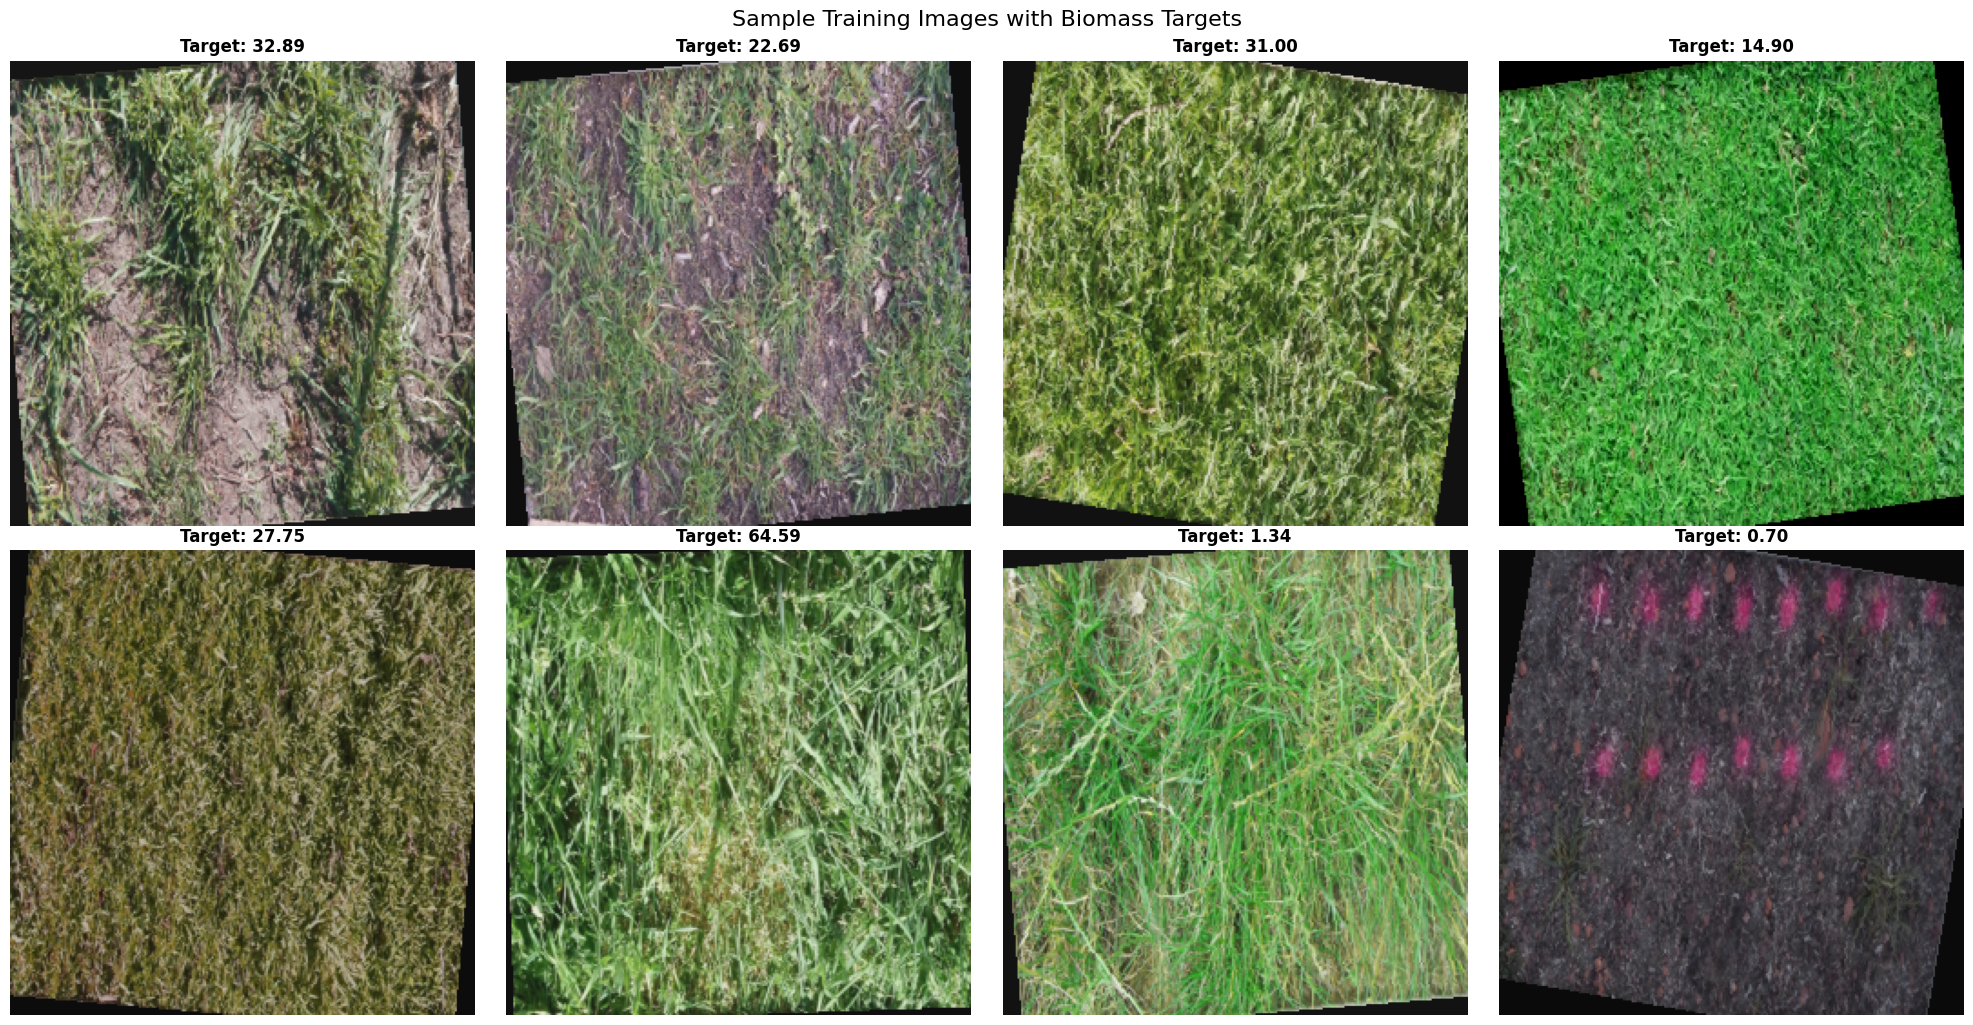

In [17]:
# Display some sample images with their targets
def display_sample_images_with_targets(dataset, num_samples=8):
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    axes = axes.ravel()
    
    indices = np.random.choice(len(dataset), num_samples, replace=False)
    
    for i, idx in enumerate(indices):
        image, target = dataset[idx]
        
        # Convert tensor back to numpy for display
        if isinstance(image, torch.Tensor):
            img_display = image.permute(1, 2, 0).numpy()
            img_display = img_display * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
            img_display = np.clip(img_display, 0, 1)
        else:
            img_display = np.array(image)
        
        axes[i].imshow(img_display)
        axes[i].set_title(f'Target: {target:.2f}', fontsize=12, weight='bold')
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.suptitle('Sample Training Images with Biomass Targets', fontsize=16, y=1.02)
    plt.show()

display_sample_images_with_targets(train_dataset)

In [18]:
import torch
import torch.nn as nn
import torchvision.models as models
import timm

class BiomassPredictor(nn.Module):
    def __init__(self, backbone='resnet50', pretrained=True):
        super(BiomassPredictor, self).__init__()
        
        # Use pre-trained CNN backbone
        if backbone == 'resnet50':
            self.backbone = models.resnet50(pretrained=pretrained)
            # Replace the final fully connected layer
            in_features = self.backbone.fc.in_features
            self.backbone.fc = nn.Identity()  # Remove the original classification head
        elif backbone == 'efficientnet_b0':
            self.backbone = timm.create_model('efficientnet_b0', pretrained=pretrained, num_classes=0)
            in_features = self.backbone.num_features
        else:
            raise ValueError(f"Unsupported backbone: {backbone}")
        
        # Regression head for biomass prediction
        self.regressor = nn.Sequential(
            nn.Dropout(0.2),
            nn.Linear(in_features, 512),
            nn.ReLU(inplace=True),
            nn.BatchNorm1d(512),
            nn.Dropout(0.3),
            nn.Linear(512, 128),
            nn.ReLU(inplace=True),
            nn.BatchNorm1d(128),
            nn.Dropout(0.2),
            nn.Linear(128, 1)  # Single output for biomass value
        )
        
    def forward(self, x):
        features = self.backbone(x)
        biomass = self.regressor(features)
        return biomass.squeeze()  # Remove extra dimension

# Create model
model = BiomassPredictor(backbone='resnet50', pretrained=True)

# Move to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

print("✅ Model created successfully!")
print(f"Using device: {device}")
print(f"Model architecture:\n{model}")

# Count parameters
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"\n📊 Total parameters: {total_params:,}")
print(f"📊 Trainable parameters: {trainable_params:,}")

/usr/local/lib/python3.11/dist-packages/pydantic/_internal/_generate_schema.py:2225: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/pydantic/_internal/_generate_schema.py:2225: UnsupportedFieldAttributeWarning: The 'frozen' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'frozen' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` 

✅ Model created successfully!
Using device: cpu
Model architecture:
BiomassPredictor(
  (backbone): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
 

In [19]:
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau

# Loss function - Mean Squared Error for regression
criterion = nn.MSELoss()

# Optimizer
optimizer = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-4)

# Learning rate scheduler
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3, verbose=True)

print("✅ Loss function, optimizer, and scheduler defined!")
print(f"Loss: {criterion}")
print(f"Optimizer: {optimizer}")
print(f"Scheduler: ReduceLROnPlateau")

✅ Loss function, optimizer, and scheduler defined!
Loss: MSELoss()
Optimizer: AdamW (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.0001
    maximize: False
    weight_decay: 0.0001
)
Scheduler: ReduceLROnPlateau


/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


In [20]:
def train_epoch(model, dataloader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    all_predictions = []
    all_targets = []
    
    for batch_idx, (images, targets) in enumerate(dataloader):
        images, targets = images.to(device), targets.to(device)
        
        # Zero gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, targets)
        
        # Backward pass
        loss.backward()
        optimizer.step()
        
        # Statistics
        running_loss += loss.item()
        all_predictions.extend(outputs.detach().cpu().numpy())
        all_targets.extend(targets.cpu().numpy())
        
        # Progress update
        if (batch_idx + 1) % 50 == 0:
            print(f'    Batch {batch_idx + 1}/{len(dataloader)}, Loss: {loss.item():.4f}')
    
    epoch_loss = running_loss / len(dataloader)
    return epoch_loss, all_predictions, all_targets

def validate_epoch(model, dataloader, criterion, device):
    model.eval()
    running_loss = 0.0
    all_predictions = []
    all_targets = []
    
    with torch.no_grad():
        for images, targets in dataloader:
            images, targets = images.to(device), targets.to(device)
            
            outputs = model(images)
            loss = criterion(outputs, targets)
            
            running_loss += loss.item()
            all_predictions.extend(outputs.cpu().numpy())
            all_targets.extend(targets.cpu().numpy())
    
    epoch_loss = running_loss / len(dataloader)
    return epoch_loss, all_predictions, all_targets

print("✅ Training and validation functions defined!")



✅ Training and validation functions defined!


In [21]:
from sklearn.model_selection import train_test_split

# Split training data into train and validation
train_indices, val_indices = train_test_split(
    range(len(train_df)), 
    test_size=0.2, 
    random_state=42,
    shuffle=True
)

print(f"Training samples: {len(train_indices)}")
print(f"Validation samples: {len(val_indices)}")

# Create subset datasets
from torch.utils.data import Subset

train_subset = Subset(train_dataset, train_indices)
val_subset = Subset(train_dataset, val_indices)

# Create data loaders for train and validation
train_loader = DataLoader(train_subset, batch_size=32, shuffle=True, num_workers=2)
val_loader = DataLoader(val_subset, batch_size=32, shuffle=False, num_workers=2)

print("✅ Train/validation split created!")
print(f"Train batches: {len(train_loader)}")
print(f"Val batches: {len(val_loader)}")

Training samples: 1428
Validation samples: 357
✅ Train/validation split created!
Train batches: 45
Val batches: 12


In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"✅ Device set to: {device}")

# Define training functions
def train_epoch(model, dataloader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    all_predictions = []
    all_targets = []
    
    for batch_idx, (images, targets) in enumerate(dataloader):
        images, targets = images.to(device), targets.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        all_predictions.extend(outputs.detach().cpu().numpy())
        all_targets.extend(targets.cpu().numpy())
        
    epoch_loss = running_loss / len(dataloader)
    return epoch_loss, all_predictions, all_targets

def validate_epoch(model, dataloader, criterion, device):
    model.eval()
    running_loss = 0.0
    all_predictions = []
    all_targets = []
    
    with torch.no_grad():
        for images, targets in dataloader:
            images, targets = images.to(device), targets.to(device)
            outputs = model(images)
            loss = criterion(outputs, targets)
            running_loss += loss.item()
            all_predictions.extend(outputs.cpu().numpy())
            all_targets.extend(targets.cpu().numpy())
    
    epoch_loss = running_loss / len(dataloader)
    return epoch_loss, all_predictions, all_targets

def calculate_metrics(predictions, targets):
    mae = mean_absolute_error(targets, predictions)
    mse = mean_squared_error(targets, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(targets, predictions)
    return mae, mse, rmse, r2

print("✅ All training functions defined!")

✅ Device set to: cpu
✅ All training functions defined!


In [23]:
import torch
import torch.nn as nn
import torchvision.models as models
import timm

class BiomassPredictor(nn.Module):
    def __init__(self, backbone='resnet50', pretrained=True):
        super(BiomassPredictor, self).__init__()
        
        if backbone == 'resnet50':
            self.backbone = models.resnet50(pretrained=pretrained)
            in_features = self.backbone.fc.in_features
            self.backbone.fc = nn.Identity()
        elif backbone == 'efficientnet_b0':
            self.backbone = timm.create_model('efficientnet_b0', pretrained=pretrained, num_classes=0)
            in_features = self.backbone.num_features
        else:
            raise ValueError(f"Unsupported backbone: {backbone}")
        
        self.regressor = nn.Sequential(
            nn.Dropout(0.2),
            nn.Linear(in_features, 512),
            nn.ReLU(inplace=True),
            nn.BatchNorm1d(512),
            nn.Dropout(0.3),
            nn.Linear(512, 128),
            nn.ReLU(inplace=True),
            nn.BatchNorm1d(128),
            nn.Dropout(0.2),
            nn.Linear(128, 1)
        )
        
    def forward(self, x):
        features = self.backbone(x)
        biomass = self.regressor(features)
        return biomass.squeeze()

# Create model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = BiomassPredictor(backbone='resnet50', pretrained=True).to(device)

print("✅ Model created successfully!")
print(f"Model is on: {device}")

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


✅ Model created successfully!
Model is on: cpu


In [24]:
import pandas as pd
import os

# Load the data
data_path = '/kaggle/input/csiro-biomass'
train_df = pd.read_csv(f'{data_path}/train.csv')
test_df = pd.read_csv(f'{data_path}/test.csv')

print("✅ Data loaded!")
print(f"Training samples: {len(train_df)}")
print(f"Test samples: {len(test_df)}")

# Make sure train_dataset exists
if 'train_dataset' not in locals():
    # Recreate the dataset if needed
    from torch.utils.data import Dataset
    import torchvision.transforms as transforms
    from PIL import Image
    
    class CorrectBiomassDataset(Dataset):
        def __init__(self, dataframe, base_dir, target_column='target', transform=None, is_test=False):
            self.dataframe = dataframe
            self.base_dir = base_dir
            self.target_column = target_column
            self.transform = transform
            self.is_test = is_test
            
        def __len__(self):
            return len(self.dataframe)
        
        def __getitem__(self, idx):
            img_relative_path = self.dataframe.iloc[idx]['image_path']
            img_full_path = os.path.join(self.base_dir, img_relative_path)
            
            try:
                img = Image.open(img_full_path).convert('RGB')
            except Exception as e:
                print(f"Error loading image {img_full_path}: {e}")
                img = Image.new('RGB', (256, 256), color='gray')
            
            if self.transform:
                img = self.transform(img)
            
            if self.is_test:
                sample_id = self.dataframe.iloc[idx]['sample_id']
                return img, sample_id
            else:
                target_value = float(self.dataframe.iloc[idx][self.target_column])
                return img, torch.tensor(target_value, dtype=torch.float32)
    
    # Create transforms
    train_transform = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.RandomHorizontalFlip(p=0.3),
        transforms.RandomRotation(10),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    
    # Create dataset
    train_dataset = CorrectBiomassDataset(
        train_df, 
        data_path, 
        target_column='target', 
        transform=train_transform
    )
    
    print("✅ train_dataset created!")

print("✅ All data variables are ready!")

✅ Data loaded!
Training samples: 1785
Test samples: 5
✅ All data variables are ready!


In [25]:
from sklearn.model_selection import train_test_split
from torch.utils.data import Subset, DataLoader

# Create train/validation split
train_indices, val_indices = train_test_split(
    range(len(train_df)), 
    test_size=0.2, 
    random_state=42,
    shuffle=True
)

print(f"Training samples: {len(train_indices)}")
print(f"Validation samples: {len(val_indices)}")

# Create subset datasets
train_subset = Subset(train_dataset, train_indices)
val_subset = Subset(train_dataset, val_indices)

# Create data loaders for train and validation
train_loader = DataLoader(train_subset, batch_size=32, shuffle=True, num_workers=2)
val_loader = DataLoader(val_subset, batch_size=32, shuffle=False, num_workers=2)

print("✅ Data loaders created!")
print(f"Train batches: {len(train_loader)}")
print(f"Val batches: {len(val_loader)}")

Training samples: 1428
Validation samples: 357
✅ Data loaders created!
Train batches: 45
Val batches: 12


In [26]:
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-4)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3, verbose=True)

print("✅ Loss function and optimizer defined!")
print(f"Criterion: {criterion}")
print(f"Optimizer: {optimizer}")

✅ Loss function and optimizer defined!
Criterion: MSELoss()
Optimizer: AdamW (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.0001
    maximize: False
    weight_decay: 0.0001
)


/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


In [27]:
import time
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def calculate_metrics(predictions, targets):
    mae = mean_absolute_error(targets, predictions)
    mse = mean_squared_error(targets, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(targets, predictions)
    return mae, mse, rmse, r2

# Training configuration
num_epochs = 20
best_val_loss = float('inf')
patience = 5
patience_counter = 0

# Lists to store metrics
train_losses = []
val_losses = []
train_metrics = []
val_metrics = []

print("🚀 Starting training...")
print(f"Epochs: {num_epochs}")
print(f"Device: {device}")
print("-" * 60)

for epoch in range(num_epochs):
    start_time = time.time()
    
    # Training phase
    train_loss, train_preds, train_targets = train_epoch(model, train_loader, criterion, optimizer, device)
    
    # Validation phase
    val_loss, val_preds, val_targets = validate_epoch(model, val_loader, criterion, device)
    
    # Calculate metrics
    train_mae, train_mse, train_rmse, train_r2 = calculate_metrics(train_preds, train_targets)
    val_mae, val_mse, val_rmse, val_r2 = calculate_metrics(val_preds, val_targets)
    
    # Update learning rate
    scheduler.step(val_loss)
    
    # Store metrics
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_metrics.append((train_mae, train_rmse, train_r2))
    val_metrics.append((val_mae, val_rmse, val_r2))
    
    # Print progress
    epoch_time = time.time() - start_time
    print(f'Epoch {epoch+1:02d}/{num_epochs} | Time: {epoch_time:.1f}s')
    print(f'  Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}')
    print(f'  Train MAE: {train_mae:.4f} | Val MAE: {val_mae:.4f}')
    print(f'  Train RMSE: {train_rmse:.4f} | Val RMSE: {val_rmse:.4f}')
    print(f'  Train R²: {train_r2:.4f} | Val R²: {val_r2:.4f}')
    print('-' * 60)
    
    # Save best model
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
        torch.save(model.state_dict(), 'best_model.pth')
        print(f'💾 Best model saved! Val Loss: {val_loss:.4f}')
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f'🛑 Early stopping after {epoch+1} epochs')
            break

print("✅ Training completed!")

🚀 Starting training...
Epochs: 20
Device: cpu
------------------------------------------------------------
Epoch 01/20 | Time: 931.6s
  Train Loss: 1245.4085 | Val Loss: 1197.8150
  Train MAE: 24.8484 | Val MAE: 26.0739
  Train RMSE: 35.2920 | Val RMSE: 35.5519
  Train R²: -0.8741 | Val R²: -0.8773
------------------------------------------------------------
💾 Best model saved! Val Loss: 1197.8150
Epoch 02/20 | Time: 916.2s
  Train Loss: 1204.2653 | Val Loss: 1173.2779
  Train MAE: 25.2091 | Val MAE: 26.6727
  Train RMSE: 34.6043 | Val RMSE: 35.1790
  Train R²: -0.8018 | Val R²: -0.8381
------------------------------------------------------------
💾 Best model saved! Val Loss: 1173.2779
Epoch 03/20 | Time: 938.1s
  Train Loss: 1182.1413 | Val Loss: 1128.4510
  Train MAE: 25.2985 | Val MAE: 26.4041
  Train RMSE: 34.2941 | Val RMSE: 34.5532
  Train R²: -0.7696 | Val R²: -0.7733
------------------------------------------------------------
💾 Best model saved! Val Loss: 1128.4510
Epoch 04/20